In [1]:
# Introduction

# The data that I will be working with is from Netflix and has information about movies and tv shows. 
# The dataset was obtained from kaggle. https://www.kaggle.com/datasets/shivamb/netflix-shows/data
# In this project, I will Cluster the Netflix data to find valuable insight.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn import datasets, metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from umap import UMAP

In [3]:
df=pd.read_csv(r'C:\Users\leonc\OneDrive\Documents\Thinkful\Datasets\Netflix\netflix_titles.csv')

In [4]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
netflix_df=df.dropna()

In [8]:
netflix_df.value_counts('release_year')

release_year
2017    657
2018    648
2016    577
2019    519
2020    442
       ... 
1959      1
1961      1
1963      1
1966      1
1942      1
Length: 72, dtype: int64

In [9]:
# Find the minimum and maximum release year
min_release_year = netflix_df['release_year'].min()
max_release_year = netflix_df['release_year'].max()
print("Minimum release year:", min_release_year)
print("Maximum release year:", max_release_year)


Minimum release year: 1942
Maximum release year: 2021


In [10]:
# Find the minimum and maximum date added
min_date_added = netflix_df['date_added'].min()
max_date_added = netflix_df['date_added'].max()

print("Minimum date added:", min_release_year)
print("Maximum date added:", max_release_year)

Minimum date added: 1942
Maximum date added: 2021


In [11]:
netflix_df.value_counts('date_added')

date_added
January 1, 2020      92
March 1, 2018        67
November 1, 2019     67
December 31, 2019    64
October 1, 2018      60
                     ..
July 21, 2017         1
July 21, 2021         1
July 22, 2020         1
July 23, 2019         1
September 9, 2021     1
Length: 1453, dtype: int64

In [12]:
# Filter the DataFrame for release years greater than 2000
nexflix_df = netflix_df[netflix_df['release_year'] > 2000]

# Get the value counts for the 'release_year' column
nexflix_df = nexflix_df['release_year'].value_counts()



In [13]:
# Convert 'date_added' column to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Filter the DataFrame for rows with 'date_added' greater than January 1, 2021
netflix_df = netflix_df[pd.to_datetime(netflix_df['date_added']) > pd.Timestamp('2017-01-01')]


# Display the filtered DataFrame
netflix_df.head(5)


C:\Users\leonc\AppData\Local\Temp\ipykernel_9524\2529520045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


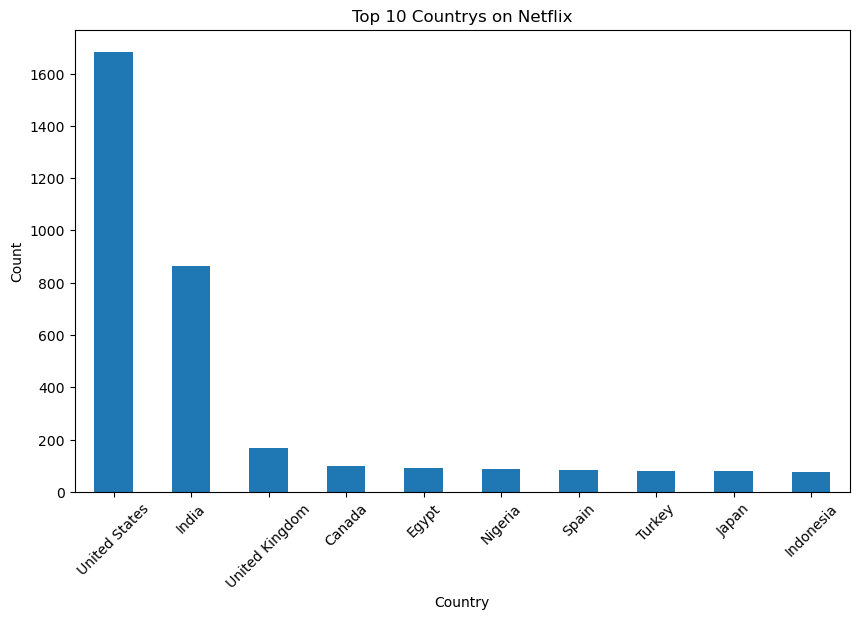

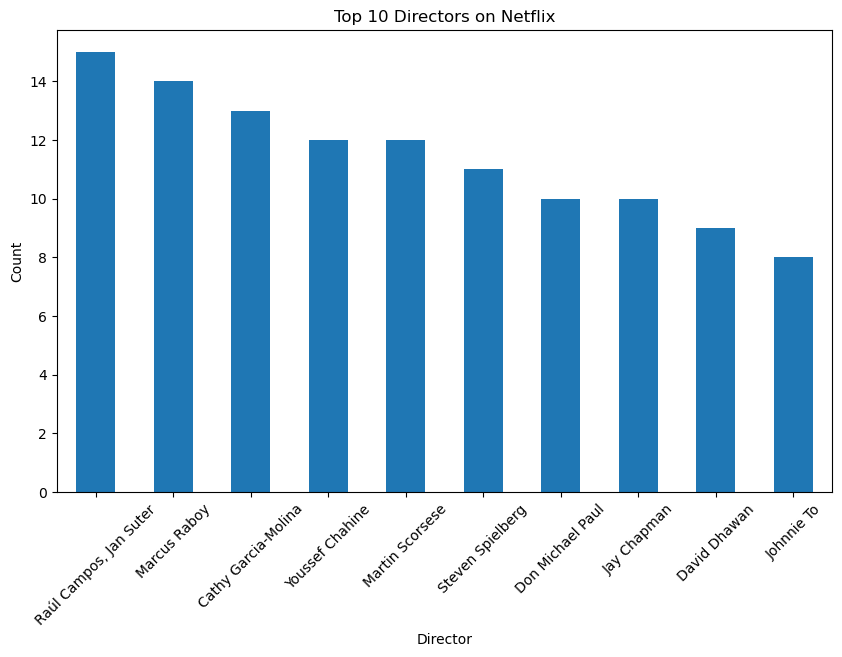

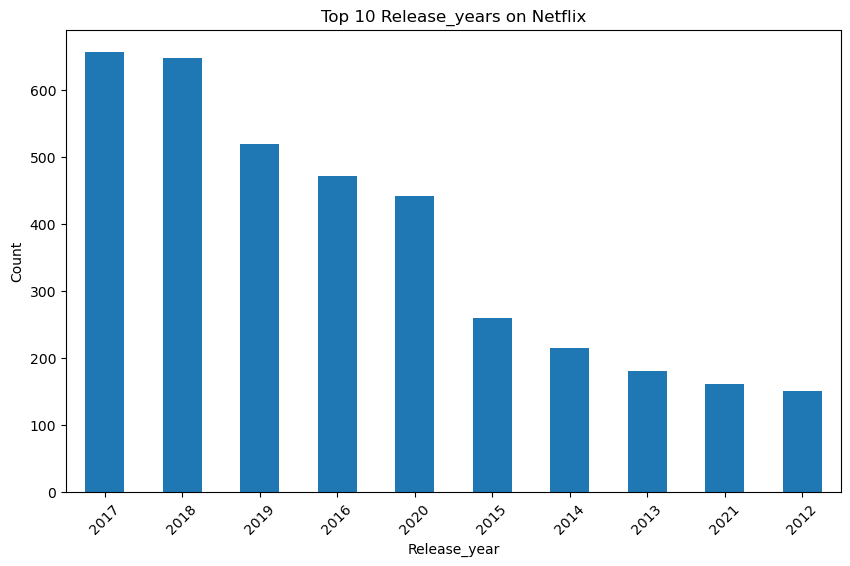

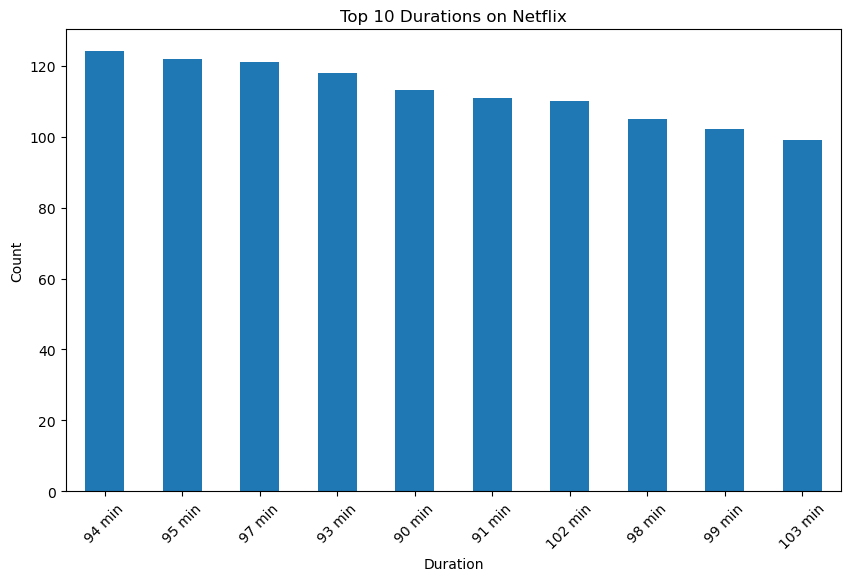

In [14]:
# Define a function to create a bar graph
def create_bar_graph(column_name, top_n=10):
    # Count occurrences of each value in the column
    column_counts = netflix_df[column_name].value_counts().head(top_n)
    
    # Plot bar graph
    plt.figure(figsize=(10, 6))
    column_counts.plot(kind='bar')
    plt.title(f'Top {top_n} {column_name.capitalize()}s on Netflix')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

# Create bar graphs for each specified column
columns_to_plot = ['country', 'director', 'release_year', 'duration']
for column in columns_to_plot:
    create_bar_graph(column)
    

In [15]:
# Get value counts for 'cast' column
cast_value_counts = netflix_df['cast'].value_counts()

# Get value counts for 'listed_in' column
listed_in_value_counts = netflix_df['listed_in'].value_counts()

# Display value counts for 'cast' column
print("Value counts for 'cast' column:")
print(cast_value_counts)
print("\n")

# Display value counts for 'listed_in' column
print("Value counts for 'listed_in' column:")
print(listed_in_value_counts)

Value counts for 'cast' column:
Samuel West                                                                                                                                                                             10
Jeff Dunham                                                                                                                                                                              7
Kevin Hart                                                                                                                                                                               6
Bill Hicks                                                                                                                                                                               4
Vir Das                                                                                                                                                                                  4
                                 

In [16]:
netflix_df['type'].value_counts()

Movie      4895
TV Show     136
Name: type, dtype: int64

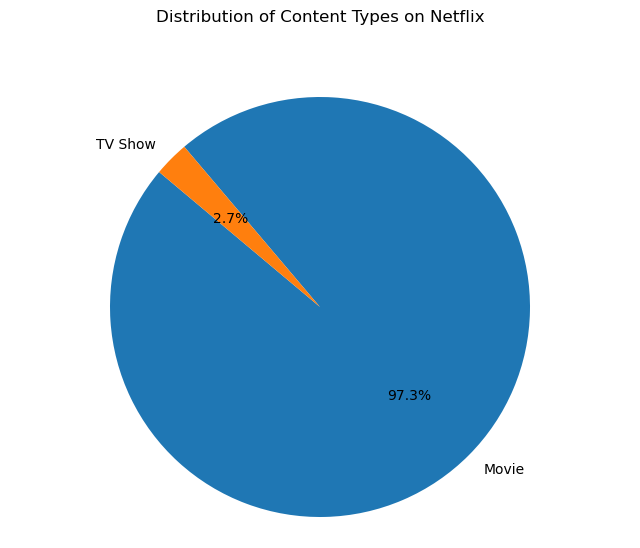

In [17]:

# Count occurrences of each type
type_counts = netflix_df['type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Types on Netflix', y=1.1)  # Adjust the value of y to increase distance
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [18]:
netflix_df.shape

(5031, 12)

In [19]:
# Remove columns 'show_id', 'date_added', and 'release_year'
netflix_df = netflix_df.drop(columns=['show_id', 'date_added', 'release_year'])


In [20]:
#convert all text in the DataFrame netflix_df to lowercase
netflix_df = netflix_df.apply(lambda x: x.astype(str).str.lower())

netflix_df.head(2)

,type,title,director,cast,country,rating,duration,listed_in,description
7,movie,sankofa,haile gerima,"kofi ghanaba, oyafunmike ogunlano, alexandra d...","united states, ghana, burkina faso, united kin...",tv-ma,125 min,"dramas, independent movies, international movies","on a photo shoot in ghana, an american model s..."
8,tv show,the great british baking show,andy devonshire,"mel giedroyc, sue perkins, mary berry, paul ho...",united kingdom,tv-14,9 seasons,"british tv shows, reality tv",a talented batch of amateur bakers face off in...


In [21]:
# Remove all numerical digits from the DataFrame
netflix_df = netflix_df.apply(lambda x: x.str.replace('\d+', ''))

# Display the DataFrame after removing numerical digits
netflix_df.head(2)


C:\Users\leonc\AppData\Local\Temp\ipykernel_9524\947074065.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  netflix_df = netflix_df.apply(lambda x: x.str.replace('\d+', ''))


,type,title,director,cast,country,rating,duration,listed_in,description
7,movie,sankofa,haile gerima,"kofi ghanaba, oyafunmike ogunlano, alexandra d...","united states, ghana, burkina faso, united kin...",tv-ma,min,"dramas, independent movies, international movies","on a photo shoot in ghana, an american model s..."
8,tv show,the great british baking show,andy devonshire,"mel giedroyc, sue perkins, mary berry, paul ho...",united kingdom,tv-,seasons,"british tv shows, reality tv",a talented batch of amateur bakers face off in...


In [22]:
import re

# Define a function to remove non-word and non-whitespace characters
def remove_non_word_whitespace(text):
    # Define regex pattern to match non-word and non-whitespace characters
    pattern = r'[^\w\s]'
    # Replace non-word and non-whitespace characters with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# Apply the function to all text columns except 'date_added'
text_columns = netflix_df.select_dtypes(include=['object']).columns.difference(['date_added'])
netflix_df[text_columns] = netflix_df[text_columns].applymap(remove_non_word_whitespace)

netflix_df.head(2)

,type,title,director,cast,country,rating,duration,listed_in,description
7,movie,sankofa,haile gerima,kofi ghanaba oyafunmike ogunlano alexandra dua...,united states ghana burkina faso united kingdo...,tvma,min,dramas independent movies international movies,on a photo shoot in ghana an american model sl...
8,tv show,the great british baking show,andy devonshire,mel giedroyc sue perkins mary berry paul holly...,united kingdom,tv,seasons,british tv shows reality tv,a talented batch of amateur bakers face off in...


In [23]:
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK data if not already downloaded
nltk.download('punkt')

# Define a function to tokenize text into words
def tokenize_text(text):
    # Tokenize text into words
    words = word_tokenize(text)
    return words

# Apply word tokenization to all text columns in the DataFrame
text_columns = netflix_df.select_dtypes(include=['object']).columns
netflix_df[text_columns] = netflix_df[text_columns].applymap(tokenize_text)

netflix_df.head(2)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leonc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,type,title,director,cast,country,rating,duration,listed_in,description
7,[movie],[sankofa],"[haile, gerima]","[kofi, ghanaba, oyafunmike, ogunlano, alexandr...","[united, states, ghana, burkina, faso, united,...",[tvma],[min],"[dramas, independent, movies, international, m...","[on, a, photo, shoot, in, ghana, an, american,..."
8,"[tv, show]","[the, great, british, baking, show]","[andy, devonshire]","[mel, giedroyc, sue, perkins, mary, berry, pau...","[united, kingdom]",[tv],[seasons],"[british, tv, shows, reality, tv]","[a, talented, batch, of, amateur, bakers, face..."


In [24]:
import nltk
from nltk.corpus import stopwords

# Download NLTK data if not already downloaded
nltk.download('stopwords')

# Define a function to remove stopwords
def remove_stopwords(words):
    # Get English stopwords
    stop_words = set(stopwords.words('english'))
    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words

# Apply stopword removal to all text columns in the DataFrame
text_columns = netflix_df.select_dtypes(include=['object']).columns
netflix_df[text_columns] = netflix_df[text_columns].applymap(remove_stopwords)

netflix_df.head(2)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leonc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,type,title,director,cast,country,rating,duration,listed_in,description
7,[movie],[sankofa],"[haile, gerima]","[kofi, ghanaba, oyafunmike, ogunlano, alexandr...","[united, states, ghana, burkina, faso, united,...",[tvma],[min],"[dramas, independent, movies, international, m...","[photo, shoot, ghana, american, model, slips, ..."
8,"[tv, show]","[great, british, baking, show]","[andy, devonshire]","[mel, giedroyc, sue, perkins, mary, berry, pau...","[united, kingdom]",[tv],[seasons],"[british, tv, shows, reality, tv]","[talented, batch, amateur, bakers, face, week,..."


In [25]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Download NLTK data if not already downloaded
nltk.download('wordnet')

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to perform lemmatization
def lemmatize_words(words):
    # Define a function to get the POS tag for each word
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {
            "J": wordnet.ADJ,
            "N": wordnet.NOUN,
            "V": wordnet.VERB,
            "R": wordnet.ADV
        }
        return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if not found

    # Lemmatize each word based on its POS tag
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    return lemmatized_words

# Apply lemmatization to all text columns in the DataFrame
text_columns = netflix_df.select_dtypes(include=['object']).columns
netflix_df[text_columns] = netflix_df[text_columns].applymap(lemmatize_words)

netflix_df.head(2)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\leonc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leonc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,type,title,director,cast,country,rating,duration,listed_in,description
7,[movie],[sankofa],"[haile, gerima]","[kofi, ghanaba, oyafunmike, ogunlano, alexandr...","[united, state, ghana, burkina, faso, united, ...",[tvma],[min],"[drama, independent, movie, international, movie]","[photo, shoot, ghana, american, model, slip, b..."
8,"[tv, show]","[great, british, baking, show]","[andy, devonshire]","[mel, giedroyc, sue, perkins, mary, berry, pau...","[united, kingdom]",[tv],[season],"[british, tv, show, reality, tv]","[talented, batch, amateur, baker, face, week, ..."


In [26]:
from gensim.models import Word2Vec

# Flatten the list of lists
tokenized_sentences = netflix_df[text_columns].values.flatten()
flattened_sentences = [word for sublist in tokenized_sentences for word in sublist]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=[flattened_sentences], vector_size=100, window=5, min_count=1, workers=4)

# Embedding words
def embed_text(tokens):
    vectors = []
    for token in tokens:
        if token in word2vec_model.wv.key_to_index:
            vectors.append(word2vec_model.wv[token])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(100)  # Return zero vector if no word is found

# Create embeddings for each text column
for col in text_columns:
    netflix_df[col + '_embedding'] = netflix_df[col].apply(embed_text)

# Save the DataFrame with embeddings to CSV
netflix_df.to_csv('embedded_dataset.csv', index=False)


In [27]:
# Load the CSV file into a DataFrame
embedded_df = pd.read_csv('embedded_dataset.csv')

# Set the option to display all columns
pd.set_option('display.max_columns', None)


# View the first few rows of the DataFrame
embedded_df.head(2)


,type,title,director,cast,country,rating,duration,listed_in,description,type_embedding,title_embedding,director_embedding,cast_embedding,country_embedding,rating_embedding,duration_embedding,listed_in_embedding,description_embedding
0,['movie'],['sankofa'],"['haile', 'gerima']","['kofi', 'ghanaba', 'oyafunmike', 'ogunlano', ...","['united', 'state', 'ghana', 'burkina', 'faso'...",['tvma'],['min'],"['drama', 'independent', 'movie', 'internation...","['photo', 'shoot', 'ghana', 'american', 'model...",[-0.00217085 0.00282569 0.00668844 0.010041...,[ 1.7863675e-04 -1.4499042e-03 -2.2888666e-03 ...,[-2.8735136e-03 -4.6726316e-05 1.5808479e-03 ...,[-2.8438533e-03 -1.4937938e-03 1.3613953e-03 ...,[-2.6303749e-03 1.0049545e-03 -1.2939961e-03 ...,[ 0.00763316 -0.0036129 0.00946695 0.008605...,[-1.0054622e-02 8.1966380e-03 7.4570351e-03 ...,[-5.7824934e-03 4.9448828e-03 2.0689589e-03 ...,[ 8.48239928e-04 -8.68701143e-04 -3.31653748e-...
1,"['tv', 'show']","['great', 'british', 'baking', 'show']","['andy', 'devonshire']","['mel', 'giedroyc', 'sue', 'perkins', 'mary', ...","['united', 'kingdom']",['tv'],['season'],"['british', 'tv', 'show', 'reality', 'tv']","['talented', 'batch', 'amateur', 'baker', 'fac...",[-5.7936287e-03 7.1027395e-03 3.3480478e-03 ...,[ 2.4313596e-03 -3.4429092e-04 -2.7576569e-03 ...,[-3.3149826e-03 -3.9650034e-03 3.0321970e-03 ...,[-7.3867349e-04 7.2769308e-04 -2.4301982e-03 ...,[-3.7916552e-03 4.3123821e-03 -1.9843574e-04 ...,[-1.0861483e-02 1.1383871e-02 5.4177009e-03 ...,[ 4.00655158e-03 7.25487294e-03 1.12365105e-...,[-5.4486552e-03 5.2229473e-03 3.4019954e-03 ...,[-9.37118952e-04 1.71901123e-03 -2.10914877e-...


In [28]:
embedded_df.value_counts('rating')

rating
['tvma']     1681
['tv']       1172
['r']         761
['pg']        727
['tvpg']      400
['tvy']       139
['tvg']        77
['g']          36
['nr']         33
['ur']          3
['nc']          1
['tvyfv']       1
dtype: int64

In [29]:

# Define the list of columns to keep
columns_to_keep = ['type_embedding', 'title_embedding', 'director_embedding', 'cast_embedding',
                   'country_embedding', 'rating_embedding', 'duration_embedding',
                   'listed_in_embedding', 'description_embedding']

# Select only the specified columns
embedded_df = embedded_df.loc[:, columns_to_keep]

# Convert string representations of arrays to actual arrays
embedded_df = embedded_df[columns_to_keep].applymap(lambda x: np.fromstring(x[1:-1], sep=' '))





In [30]:
# Calculate the average embedding for each column
embedded_df_mean = embedded_df[columns_to_keep].applymap(lambda x: np.mean(x, axis=0))

# Apply scaling to the DataFrame with average embeddings
scaler = StandardScaler()
X_scaled = scaler.fit_transform(embedded_df_mean)

# Create a DataFrame with the scaled values
X_scaled_df = pd.DataFrame(X_scaled, columns=embedded_df_mean.columns)


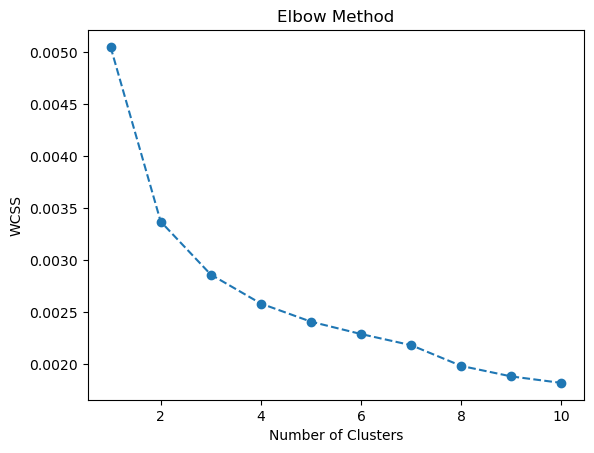

In [31]:
# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embedded_df_mean)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

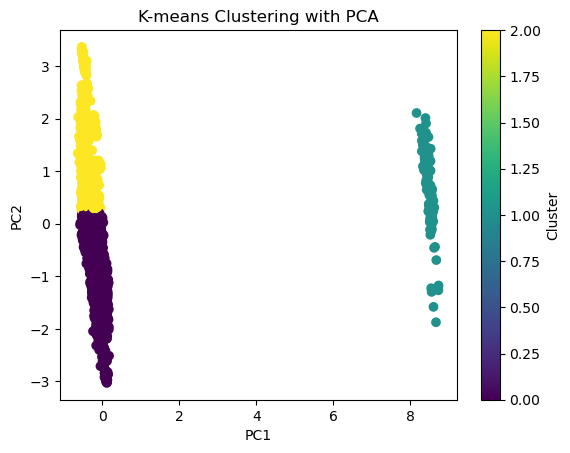

In [32]:
# Perform PCA
pca = PCA(n_components=2)  # You can choose the number of components
X_pca = pca.fit_transform(X_scaled_df)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)


# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering with PCA')
plt.colorbar(label='Cluster')
plt.show()

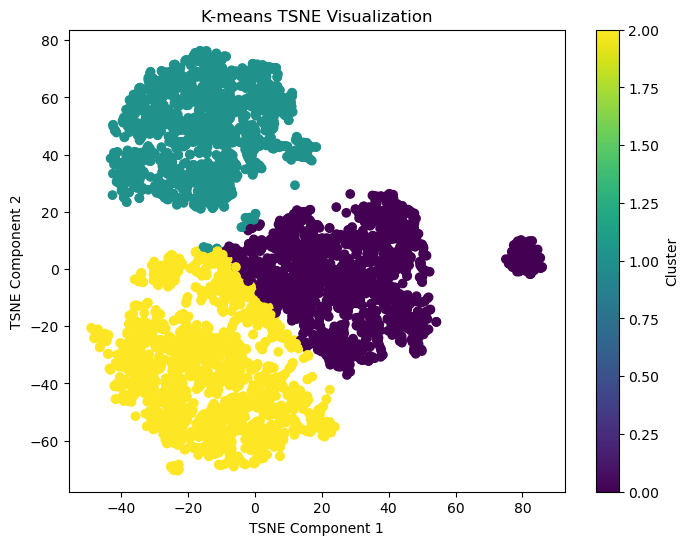

C:\Users\leonc\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


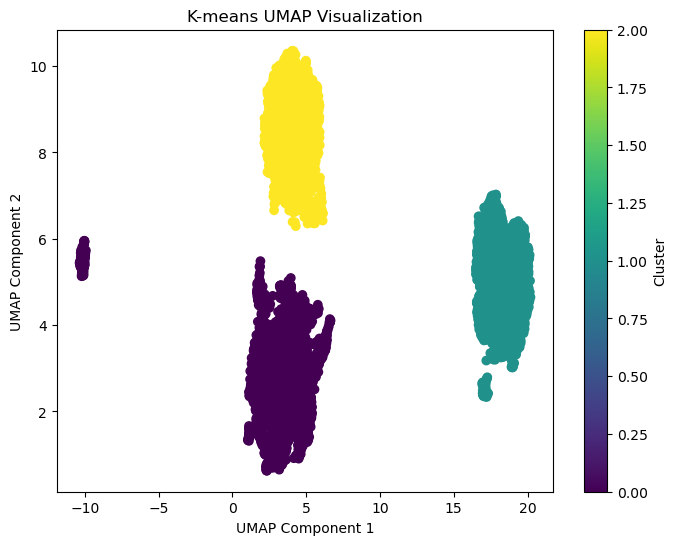

In [33]:
# Initialize TSNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform data using TSNE
X_tsne = tsne.fit_transform(X_scaled_df)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_tsne)

# Plot TSNE visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means TSNE Visualization')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Initialize UMAP
umap = UMAP(n_components=2, random_state=42)

# Fit and transform data using UMAP
X_umap = umap.fit_transform(X_scaled_df)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_umap)
# Plot UMAP visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means UMAP Visualization')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [34]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-means using original data
kmeans_silhouette_pca = silhouette_score(X_pca, kmeans.labels_)

print("Silhouette Score for K-means clustering  with pca:", kmeans_silhouette_pca)

# Compute the silhouette score for K-means clustering with t-SNE
silhouette_score_tsne = silhouette_score(X_tsne, kmeans.labels_)
print("Silhouette Score for K-means clustering with t-SNE:", silhouette_score_tsne)


Silhouette Score for K-means clustering  with pca: 0.2127180323873721
Silhouette Score for K-means clustering with t-SNE: 0.48766166


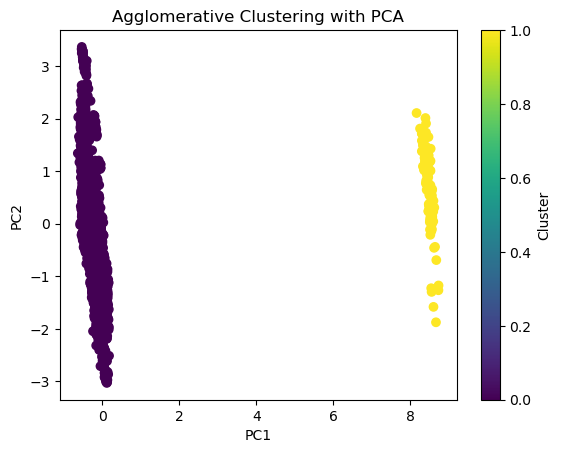

In [35]:
agglo_pca = PCA(n_components=2)  # You can choose the number of components
agglo_X_pca = agglo_pca.fit_transform(X_scaled_df)


# Apply Agglomerative Clustering
agglomerative = AgglomerativeClustering()
agglomerative.fit(agglo_X_pca)



# Plot Agglomerative Clustering with PCA
plt.scatter(agglo_X_pca[:, 0], agglo_X_pca[:, 1], c=agglomerative.labels_, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clustering with PCA')
plt.colorbar(label='Cluster')
plt.show()

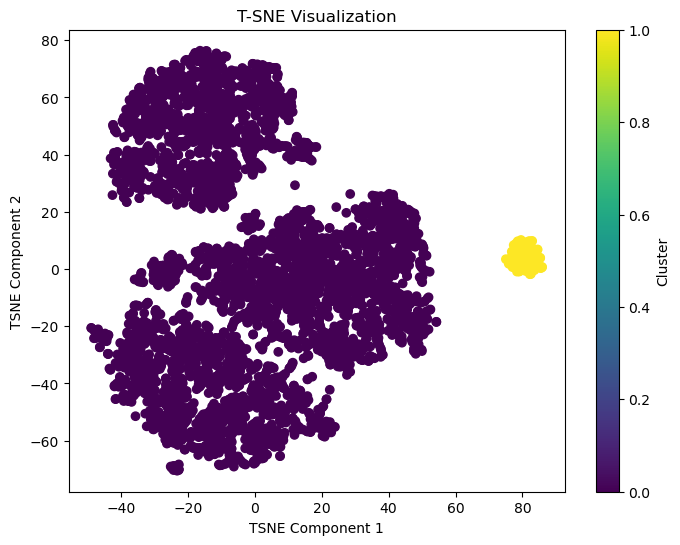

C:\Users\leonc\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


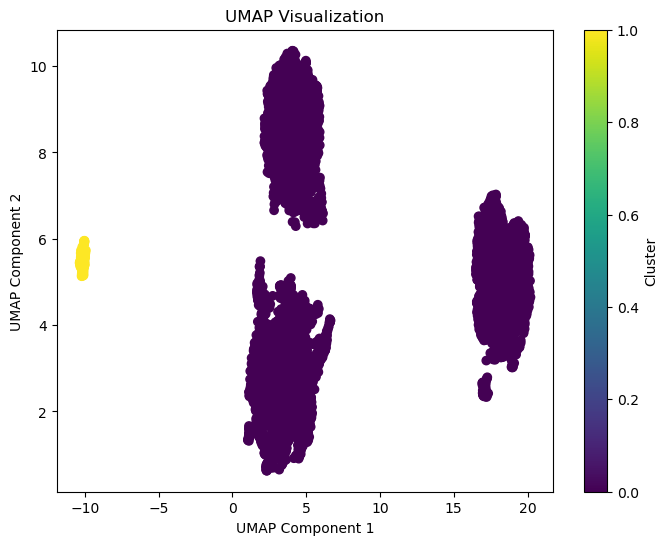

In [36]:


# Apply T-SNE
agglo_tsne = TSNE(n_components=2, random_state=42)
agglo_X_tsne = agglo_tsne.fit_transform(X_scaled_df)

# Plot T-SNE visualization
plt.figure(figsize=(8, 6))
plt.scatter(agglo_X_tsne[:, 0], agglo_X_tsne[:, 1], c=agglomerative.labels_, cmap='viridis')
plt.title('T-SNE Visualization')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Apply UMAP
agglo_umap = UMAP(n_components=2, random_state=42)
agglo_X_umap = agglo_umap.fit_transform(X_scaled_df)

# Plot UMAP visualization
plt.figure(figsize=(8, 6))
plt.scatter(agglo_X_umap[:, 0], agglo_X_umap[:, 1], c=agglomerative.labels_, cmap='viridis')
plt.title('UMAP Visualization')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [37]:
# Calculate silhouette score for Agglomerative Clustering
agglomerative_silhouette = silhouette_score(agglo_X_pca, agglomerative.labels_)

print("Silhouette Score for Agglomerative Clustering:", agglomerative_silhouette)

Silhouette Score for Agglomerative Clustering: 0.8504557320499009


In [39]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index for K-means clustering 
dbi_kmeans_pca = davies_bouldin_score(X_tsne, kmeans.labels_)

# Calculate Davies-Bouldin Index for Agglomerative Clustering 
dbi_agglomerative_pca = davies_bouldin_score(agglo_X_pca, agglomerative.labels_)

print("Davies-Bouldin Index for K-means clustering with T-SNE:", dbi_kmeans_pca)
print("Davies-Bouldin Index for Agglomerative Clustering with PCA:", dbi_agglomerative_pca)


Davies-Bouldin Index for K-means clustering with T-SNE: 0.7810114273602052
Davies-Bouldin Index for Agglomerative Clustering with PCA: 0.17950716404264255


In [40]:
# Add cluster labels to the DataFrame
netflix_df['Clusters'] = agglomerative.labels_


In [41]:
netflix_df.head(2)

,type,title,director,cast,country,rating,duration,listed_in,description,type_embedding,title_embedding,director_embedding,cast_embedding,country_embedding,rating_embedding,duration_embedding,listed_in_embedding,description_embedding,Clusters
7,[movie],[sankofa],"[haile, gerima]","[kofi, ghanaba, oyafunmike, ogunlano, alexandr...","[united, state, ghana, burkina, faso, united, ...",[tvma],[min],"[drama, independent, movie, international, movie]","[photo, shoot, ghana, american, model, slip, b...","[-0.0021708484, 0.0028256902, 0.0066884435, 0....","[0.00017863675, -0.0014499042, -0.0022888666, ...","[-0.0028735136, -4.6726316e-05, 0.0015808479, ...","[-0.0028438533, -0.0014937938, 0.0013613953, 0...","[-0.0026303749, 0.0010049545, -0.0012939961, -...","[0.007633164, -0.0036128955, 0.009466952, 0.00...","[-0.010054622, 0.008196638, 0.007457035, 0.005...","[-0.0057824934, 0.004944883, 0.002068959, 0.00...","[0.0008482399, -0.00086870114, -0.0033165375, ...",0
8,"[tv, show]","[great, british, baking, show]","[andy, devonshire]","[mel, giedroyc, sue, perkins, mary, berry, pau...","[united, kingdom]",[tv],[season],"[british, tv, show, reality, tv]","[talented, batch, amateur, baker, face, week, ...","[-0.0057936287, 0.0071027395, 0.0033480478, 0....","[0.0024313596, -0.00034429092, -0.0027576569, ...","[-0.0033149826, -0.0039650034, 0.003032197, 0....","[-0.0007386735, 0.0007276931, -0.0024301982, 0...","[-0.0037916552, 0.004312382, -0.00019843574, -...","[-0.010861483, 0.011383871, 0.005417701, 0.010...","[0.0040065516, 0.007254873, 0.001123651, -0.00...","[-0.005448655, 0.0052229473, 0.0034019954, 0.0...","[-0.00093711895, 0.0017190112, -0.0021091488, ...",1


In [42]:
# Summary statistics for the 'Clusters' column
clusters_summary = netflix_df['Clusters'].describe()
print(clusters_summary)


count    5031.000000
mean        0.027032
std         0.162194
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Clusters, dtype: float64


In [43]:
# Frequency count of each cluster
cluster_counts = netflix_df['Clusters'].value_counts()
print(cluster_counts)


0    4895
1     136
Name: Clusters, dtype: int64


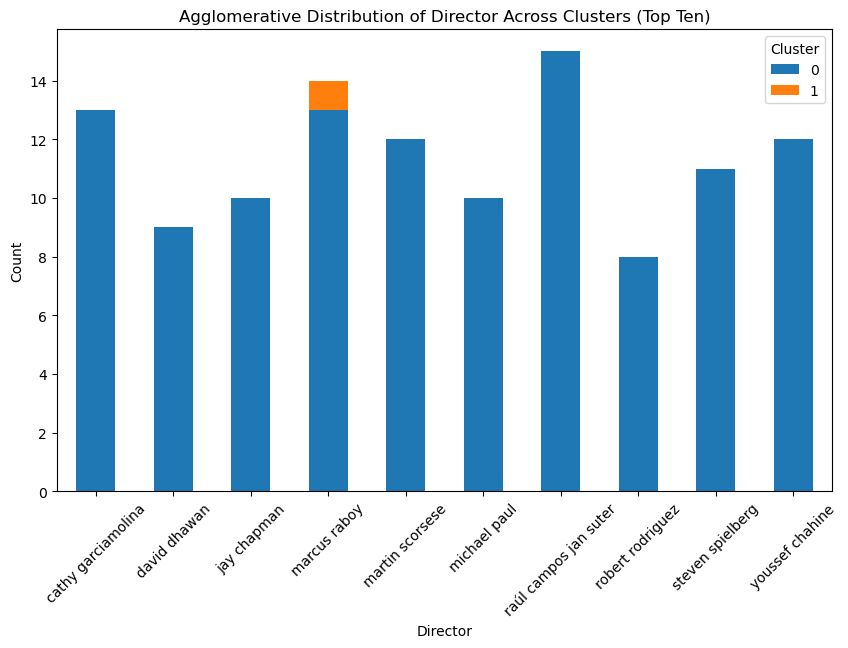

In [44]:
# Convert lists in 'director' column to strings
netflix_df['director'] = netflix_df['director'].apply(lambda x: ' '.join(x))

# Calculate the counts of each director
director_counts = netflix_df['director'].value_counts()

# Select the top ten directors
top_ten_directors = director_counts.head(10).index.tolist()

# Filter the DataFrame for only the top ten directors
netflix_df_top_ten = netflix_df[netflix_df['director'].isin(top_ten_directors)]

# Create a cross-tabulation between 'director' and 'Clusters'
director_cluster_cross_tab = pd.crosstab(netflix_df_top_ten['director'], netflix_df_top_ten['Clusters'])

# Plot the cross-tabulation
director_cluster_cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Agglomerative Distribution of Director Across Clusters (Top Ten)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Cluster')
plt.show()


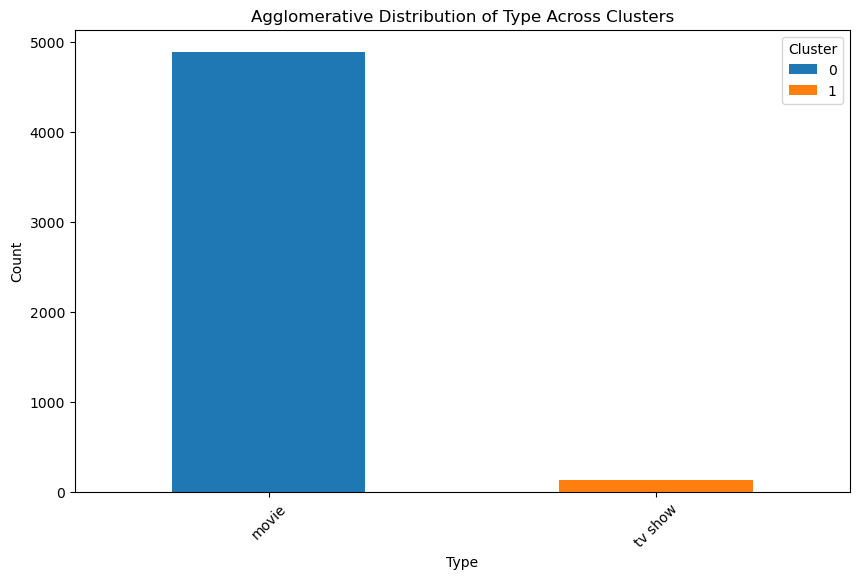

In [45]:
# Convert lists in 'type' column to strings
netflix_df['type'] = netflix_df['type'].apply(lambda x: ' '.join(x))

# Calculate the counts of each type
type_counts = netflix_df['type'].value_counts()

# Select the top ten types
top_ten_types = type_counts.head(10).index.tolist()

# Filter the DataFrame for only the top ten types
netflix_df_top_ten_types = netflix_df[netflix_df['type'].isin(top_ten_types)]

# Create a cross-tabulation between 'type' and 'Clusters'
type_cluster_cross_tab = pd.crosstab(netflix_df_top_ten_types['type'], netflix_df_top_ten_types['Clusters'])

# Plot the cross-tabulation
type_cluster_cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Agglomerative Distribution of Type Across Clusters')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Cluster')
plt.show()


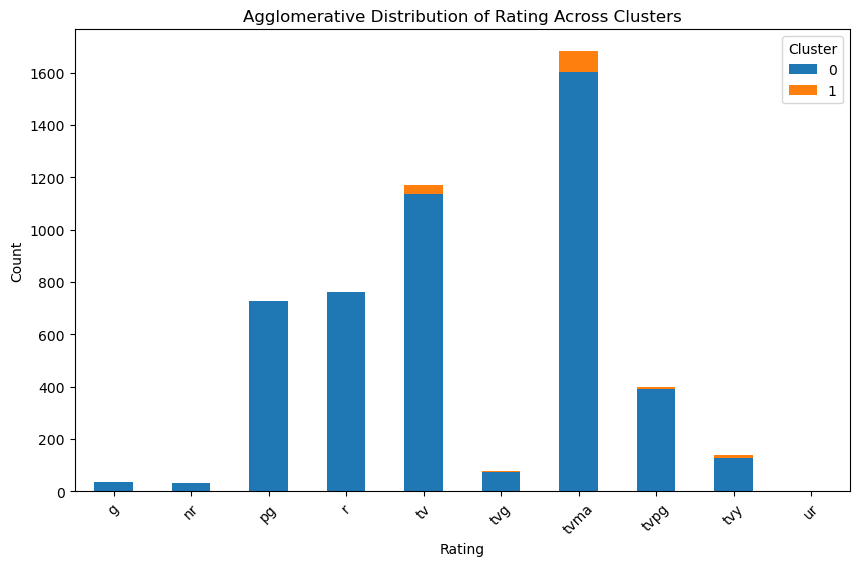

In [46]:
# Convert lists in 'rating' column to strings
netflix_df['rating'] = netflix_df['rating'].apply(lambda x: ' '.join(x))

# Calculate the counts of each rating
rating_counts = netflix_df['rating'].value_counts()

# Select the top ten ratings
top_ten_ratings = rating_counts.head(10).index.tolist()

# Filter the DataFrame for only the top ten ratings
netflix_df_top_ten_ratings = netflix_df[netflix_df['rating'].isin(top_ten_ratings)]

# Create a cross-tabulation between 'rating' and 'Clusters'
rating_cluster_cross_tab = pd.crosstab(netflix_df_top_ten_ratings['rating'], netflix_df_top_ten_ratings['Clusters'])

# Plot the cross-tabulation
rating_cluster_cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Agglomerative Distribution of Rating Across Clusters')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Cluster')
plt.show()


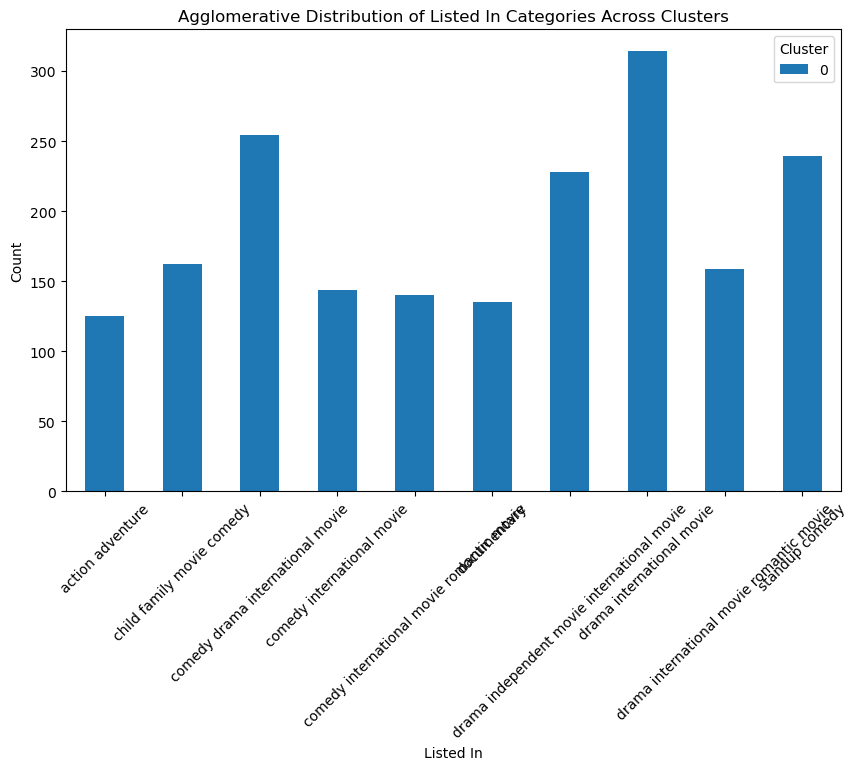

In [47]:
# Convert lists in 'listed_in' column to strings
netflix_df['listed_in'] = netflix_df['listed_in'].apply(lambda x: ' '.join(x))

# Calculate the counts of each category in 'listed_in'
listed_in_counts = netflix_df['listed_in'].value_counts()

# Select the top ten categories in 'listed_in'
top_ten_listed_in = listed_in_counts.head(10).index.tolist()

# Filter the DataFrame for only the top ten categories in 'listed_in'
netflix_df_top_ten_listed_in = netflix_df[netflix_df['listed_in'].isin(top_ten_listed_in)]

# Create a cross-tabulation between 'listed_in' and 'Clusters'
listed_in_cluster_cross_tab = pd.crosstab(netflix_df_top_ten_listed_in['listed_in'], netflix_df_top_ten_listed_in['Clusters'])

# Plot the cross-tabulation
listed_in_cluster_cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Listed In')
plt.ylabel('Count')
plt.title('Agglomerative Distribution of Listed In Categories Across Clusters')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Cluster')
plt.show()


In [48]:
#Conclusion

# The best model is the Agglomerative clustering.It has a higher Silhouette Score than K-means, indicating that data points
# fit well to their clusters and that clusters are well separated from each other. 
# The Agglomerative model also has a lower Davies-Bouldin Index, showing that cluster are more tightly packed and
# well separated.

# Agglomerative clusters are mostly based on the content type; It separates movies and TV shows. This is an area that can be
# explored further. 

# More exploration of the Agglomerative clusters can lead to more actionable insight.